In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [25]:
api_key = '5605a1a7a610199980838a42c30cf400'  # Replace with your API key
city = 'London'
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metrics"


In [26]:
response = requests.get(url)
weather_data = response.json()
weather_data

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 284.85,
  'feels_like': 284.35,
  'temp_min': 283.96,
  'temp_max': 285.37,
  'pressure': 1029,
  'humidity': 87,
  'sea_level': 1029,
  'grnd_level': 1026},
 'visibility': 10000,
 'wind': {'speed': 2.06, 'deg': 30},
 'clouds': {'all': 100},
 'dt': 1730519928,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1730530576,
  'sunset': 1730565106},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [4]:
def extract_weather_attributes(data):
    return {
        "Temperature (°C)": data['main']['temp'],
        "Humidity (%)": data['main']['humidity'],
        "Wind Speed (m/s)": data['wind']['speed'],
        "Weather": data['weather'][0]['description']
    }

weather_attributes = extract_weather_attributes(weather_data)
print(weather_attributes)

{'Temperature (°C)': 11.7, 'Humidity (%)': 86, 'Wind Speed (m/s)': 2.06, 'Weather': 'overcast clouds'}


In [5]:
# Convert the extracted weather data into a DataFrame
df = pd.DataFrame([weather_attributes])

# Ensure there are no missing values (though this is rare in this case)
df.fillna(method='ffill', inplace=True)
print(df)

   Temperature (°C)  Humidity (%)  Wind Speed (m/s)          Weather
0              11.7            86              2.06  overcast clouds


C:\Users\asus\AppData\Local\Temp\ipykernel_14448\3878946380.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [6]:
print("Average Temperature: ", df['Temperature (°C)'].mean())


Average Temperature:  11.7


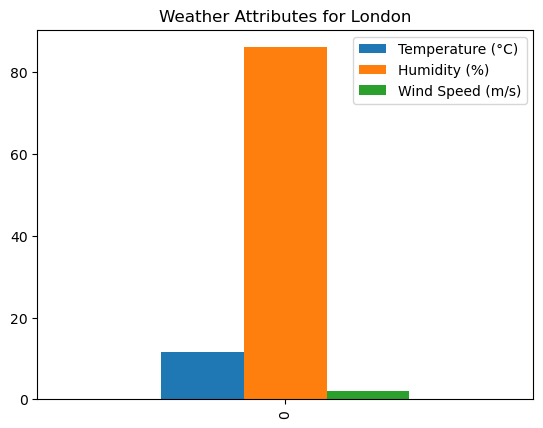

In [7]:
df.plot(kind='bar', title="Weather Attributes for London")
plt.show()